---



# <font color='#ECA702'>**Análisis Multimodal de Síntomas en la Enfermedad de Parkinson**</font>

In [15]:
#@title **Importar librerías**

# Manipulación de datos
import os
import cv2
import numpy as np
import librosa
import pandas as pd

# Pytorch essentials
import torch

# Utils
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg

#Para Análisis de componentes principales
from sklearn.decomposition import PCA

In [16]:
#@title **Cargamos los datos desde Drive**



from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/data_parkinson')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1XRruCPRodR4OhRCRZYKsyODqa_GuBkfC/data_parkinson


# <font color='#81d4fa'> **Reducción de la dimensionalidad**</font>

<p align='justify'>La reducción de dimensionalidad es una técnica en el análisis de datos y la inteligencia artificial que se utiliza para reducir el número de variables o características en un conjunto de datos, de tal forma que se pierda la mínima cantidad de información relevante. De este modo, manteniendo la mayor cantidad de características que expliquen la mayor cantidad de los datos, como sea posible. Es decir, por ejemplo, si se quisiera detectar un animal en una imagen, no todos los pixeles serían de ayuda en este proceso. Mientras que los pixeles que contienen la forma del animal poseen la mayor cantidad de información que permite exponer y explicar si una imagen contiene un animal o no, otros pixeles no ayudarían mucho a esta tarea; como, por ejemplo, aquellos pixeles que revelan información sobre el color y forma del fondo de la imagen. La reducción de dimensionalidad encara este problema y permite que estos pixeles que no brindan mucha información sobre aquello que se quiere detectar de una imagen sean ignorados, de tal forma que, posteriormente, se pueda entrenar un modelo de inteligencia artificial con un número menor de pixeles (Características) que si se utilizarán todos los pixeles (Características) de la imagen original, sin reducción</p>

<br>

## <font color='#01fe40'> **Principal Component Analysis (PCA)**</font>
<p align='justify'> El PCA o Análisis de Componentes principales es una técnica de reducción de dimensionalidad, cuyo objetivo es convertir un conjunto con innumerables variables, en un espacio con variables reducidas. Estas variables se les llaman componentes principales y son combinaciones lineales de las variables originales: Es decir, son halladas mediante ecuaciones matemáticas que involucran parejas de términos (Generalmente, una constante y un espacio vectorial o matriz) realizando una multiplicación entre sí; donde, estas parejas, son unidas mediante sumas.
<br> <br>
Ejemplo:

$$
\begin{aligned}
v = k_1v_1+k_2v_2+...+k_nv_n = \sum_{i=1}^{n}k_iv_i
\\
Donde\,k:\,Constante\;\&\;v:\,Espacio\,vectorial
\end{aligned}
$$

<br>

Este proceso será explicado en mayor detalle posteriormente.

</p>

<p align='justify'>El punto principal del PCA es encontrar las direcciones (Componentes principales) en la que los datos presentan una mayor varianza. Tras obtener estas direcciones, se ordenan de manera descendente, de tal forma que el primer componente principal capture la mayor cantidad de variabilidad en los datos, el segundo componente principal capture la mayor cantidad de variabilidad restante que dejó el primer componente principal, el tercer componente principal capture la mayor cantidad de variabilidad restante que dejaron el primer y segundo componente principal y así sucesivamente.</p>

<br>

### <font color='#b9ff66'> **Como realizar un Principal Component Analysis (PCA)**</font>


<p align='justify'>Para realizar el análisis de componentes se usará la librería "sklearn" en su módulo "descomposition" importando la clase "PCA". Debido a que esta clase realiza un PCA que hace uso del SVD (Singular value descomposition o Descomposición en Valores Singulares) así como estipula su página web:</p>

<blockquote cite="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"> <em>Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.</em></blockquote>

<p align='justify'>Se explicará el proceso para realizar un análisis de componentes principales, haciendo uso de la descomposición en valores singulares.</p>

<br>

<p align='justify'>En principio, cabe resaltar que la base del PCA es poder encontrar grupos de valores que se reúnan entre ciertos rangos concretos, por lo que, se debe tener en cuenta, que las imágenes, al ser un conjunto de pixeles con determinados colores dispuestas en una matriz, pueden producir estos conjuntos de valores en una gráfica. A estos grupos de valores arrejuntados en un rango concreto se les llama “Clúster”.</p>

<p align='justify'>La representación de una imagen en un computador se compone de pixeles con colores en ciertos puntos del espacio de la pantalla. Los colores son un conjunto de capas (Haciendo uso del sistema RGB presente en la mayoría de los computadores, se encuentran 3 capas: Red, Green y Blue). Similar a una receta; donde se deben poner 100 gramos del ingrediente 1, 200 gramos del ingrediente 2 y una pizca del ingrediente 3, así mismo, un color (Como, por ejemplo, el naranja) consta de una poca cantidad de rojo, cierta cantidad de verde y un toque de azul. Por tanto, cuando un color se muestra en pantalla, lo que se hace es, descomponer ese color en sus componentes principales de rojo, verde y azul; tras esto, se coloca la cantidad de intensidad correspondiente de rojo, de verde y de azul que hay en ese color en una matriz de dimensiones (M x N x 3), en cada pixel se dispone la intensidad de rojo, verde y azul que indique la matriz y, finalmente, se superponen para producir el color final. Debido a que la “receta”, por así decirlo, del color naranja, posee la misma cantidad de rojo, de verde y de azul, cuando este color sea separado en sus 3 capas correspondientes (Red, green, blue o RGB), los valores de la intensidad del rojo, verde y azul sean dispuestos en una gráfica de 3 dimensiones, habrá grupos de puntos que se agruparan en cierta área de la gráfica.</p>

<center>
  <p align='justify'>Por ejemplo:</p>
</center>

<center>
  <p>Teniendo en cuenta la siguiente imágen:</p>
</center>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/bola%20morada.jpg" alt="Un círculo de color morado sobre fondo blanco">
</center>

<br><br>

<center>
  <p>Que posee los siguientes valores rgb para el color del círculo:</p>
</center>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/valores%20de%20morado%20de%20bola%20morada.png" alt="Valores RGB para el color morado del círculo de la imagen anterior">
</center>

<br><br>

<p align='justify'>Al separar sus capas RGB y graficar los valores en un gráfico de tres dimensiones, donde el eje X represente el canal rojo, el eje Y represente el canal verde y el eje Z represente el canal azul; se obtendría un conjunto de puntos agrupados en un clúster cerca de los valores RGB que componen la imagen; como se puede apreciar en el siguiente código:</p>


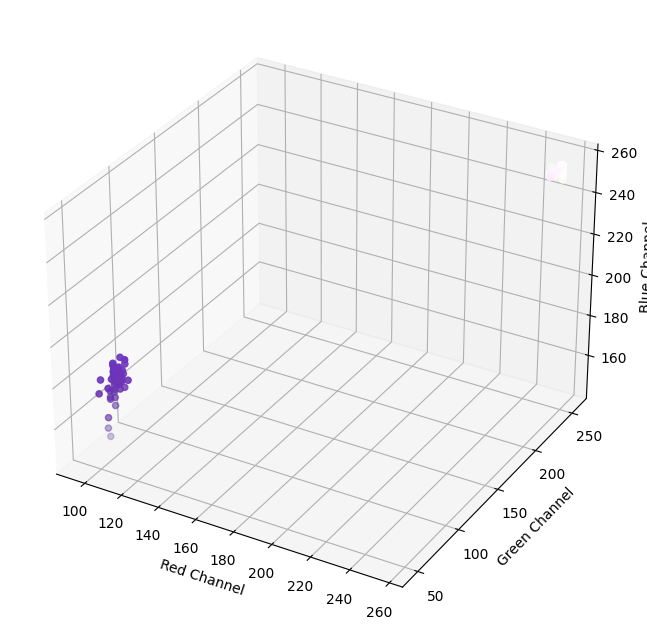

In [17]:
# @title
# Se lee la imágen
img = mpimg.imread('/content/drive/MyDrive/UIS/SEMESTRE 7/INTELIGENCIA ARTIFICIAL/PROYECTO FINAL/Proyecto_Final_IA1_UIS/notebooks/figures/bola morada.jpg')

# Se obtienen los canales RGB
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

np.random.seed(1010110)

"""
Se crea una figure para el gráfico 3D
y se añade un subplot cuya proyección será
en tres dimensiones, lo que permite realizar
el gráfico 3D
"""
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')




"""
Debido a que si tomamos todos los datos, sería mucha información
para que el computador la maneje, se toma una muestra de los valores
de intesnidad de los canales y se muestran como puntos
en el gráfico, donde el eje X representa el canal Rojo, el eje Y representa
el canal Verde y el eje Z representa el canal Azul.
Luego, se toman de manera aleatoría algunos de los índices de la matriz que
indican donde se encuentran los valores para, luego, usarlos para tomar samples
de la matriz original para cada uno de los canales
"""
indices = np.random.choice(np.arange(red_channel.size), size=1000, replace=False)



"""
Se aplana el array con numpy.ravel y, luego, de ese array aplanado, se toman
samples basados en el índice obtenido anteriormente
"""
x = red_channel.ravel()[indices]
y = green_channel.ravel()[indices]
z = blue_channel.ravel()[indices]




"""
Se grafican los valores dentro de cada uno de los array y se les pone el mismo
color de la imágen, a través de sobreponer todas las capas de la imagen,
luego, encontrar la transpuesta (Para cambiar el orden de BGR a RGB) y, finalmente
se normalizan dividiendo por 255
"""
ax.scatter(x, y, z, c=np.vstack((x, y, z)).T / 255.0, marker='o')



# Se etiquetan los ejes
ax.set_xlabel('Red Channel')
ax.set_ylabel('Green Channel')
ax.set_zlabel('Blue Channel')

# Se muestra la gráfica
plt.show()

<p align='justify'>
Y, basándose en este concepto es que se puede realizar un análisis de componentes principales.
</p>

#### <font color='#d3e62c'> **&nbsp;&nbsp;&nbsp;1. Separar la imágen en sus canales**</font>

<p align='justify'>Teniendo en cuenta lo mencionado anteriormente, el primer paso es separar el canal rojo, verde y azul de la imágen original, de tal forma que las matrices que contienen la cantidad de intensidad que tiene cada canal un un pixel determinado, sean accesibles.</p>

<center>
  <img src='https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/matrices%20de%20canales%20rgb.png' alt='Imagen de un conjunto de matrices que representan los canales RGB de una imagen cualquiera. Autor en las referencias'></img>
</center>

<p align='justify'>Tras esto, se aplanan las matrices, de tal manera que resulten tranformadas en vectores unidmiensionales.</p>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/flattening%20image%20channels.png" alt="Canales de la imagen RGB separados en arreglos unidimensionales">
</center>

<p align='justify'>Posteriormente, estos arreglos se concatenan dentro de una sola matriz, de tal forma que las columnas de esa matriz sean cada uno de los canales RGB de la imágen y cada una de las filas los píxeles que tiene la matriz. De esta forma, al revisar una fila de la matriz, se puede saber que valores componen el color que, finalmente, muestra ese pixel en pantalla.</p>


<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/concat%20images%20channels.png" alt="Concatenación de los canales RGB en una sola matriz">
</center>








# <p align='justify'>**PRIMERO DEBO PONER COMO EMPEZAR CON UNA MATRIZ DE PIXELES. LUEGO, EN MITAD DE LA EXPLICACIÓN CAMBIAMOS A LA EXPLICACIÓN DE STATQUEST**</p>

En un problema multiclase haría algo así:

<center>
  <img src="https://www.askpython.com/wp-content/uploads/2020/10/Visualizing-digits-data-in-2-dimensions-2-1024x512.jpeg.webp" alt="Descripción de la imagen">
</center>


En el cual las clases iniciales eran las siguientes:

<center>
  <img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png" width="600" height="400">
</center>



(462, 461, 3)


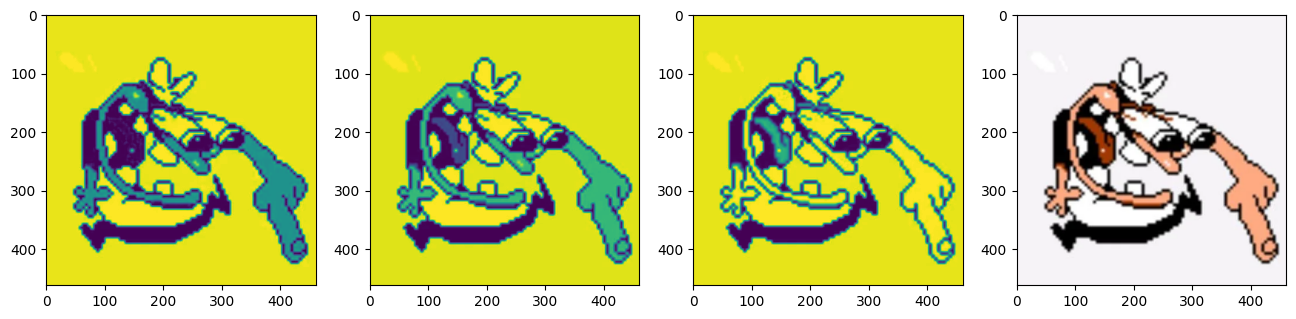

In [18]:
img = cv2.imread('/content/drive/MyDrive/UIS/SEMESTRE 7/INTELIGENCIA ARTIFICIAL/PROYECTO FINAL/Proyecto_Final_IA1_UIS/notebooks/figures/Sin título.png') #you can use any image you want.
print( img.shape )
plt.figure(figsize=(16,9))

for i in range(3):
  plt.subplot(1, 4, i+1)
  plt.imshow(img[:,:,i])


red_channel = img[:,:,2]
green_channel = img[:,:,1]
blue_channel = img[:,:,0]
plt.subplot(1, 4, 4)
plt.imshow( np.dstack((red_channel, green_channel, blue_channel)) )



# **El siguiente código permite iterar sobre distintos porcentajes para ver cual PCA es la mejor a usar**

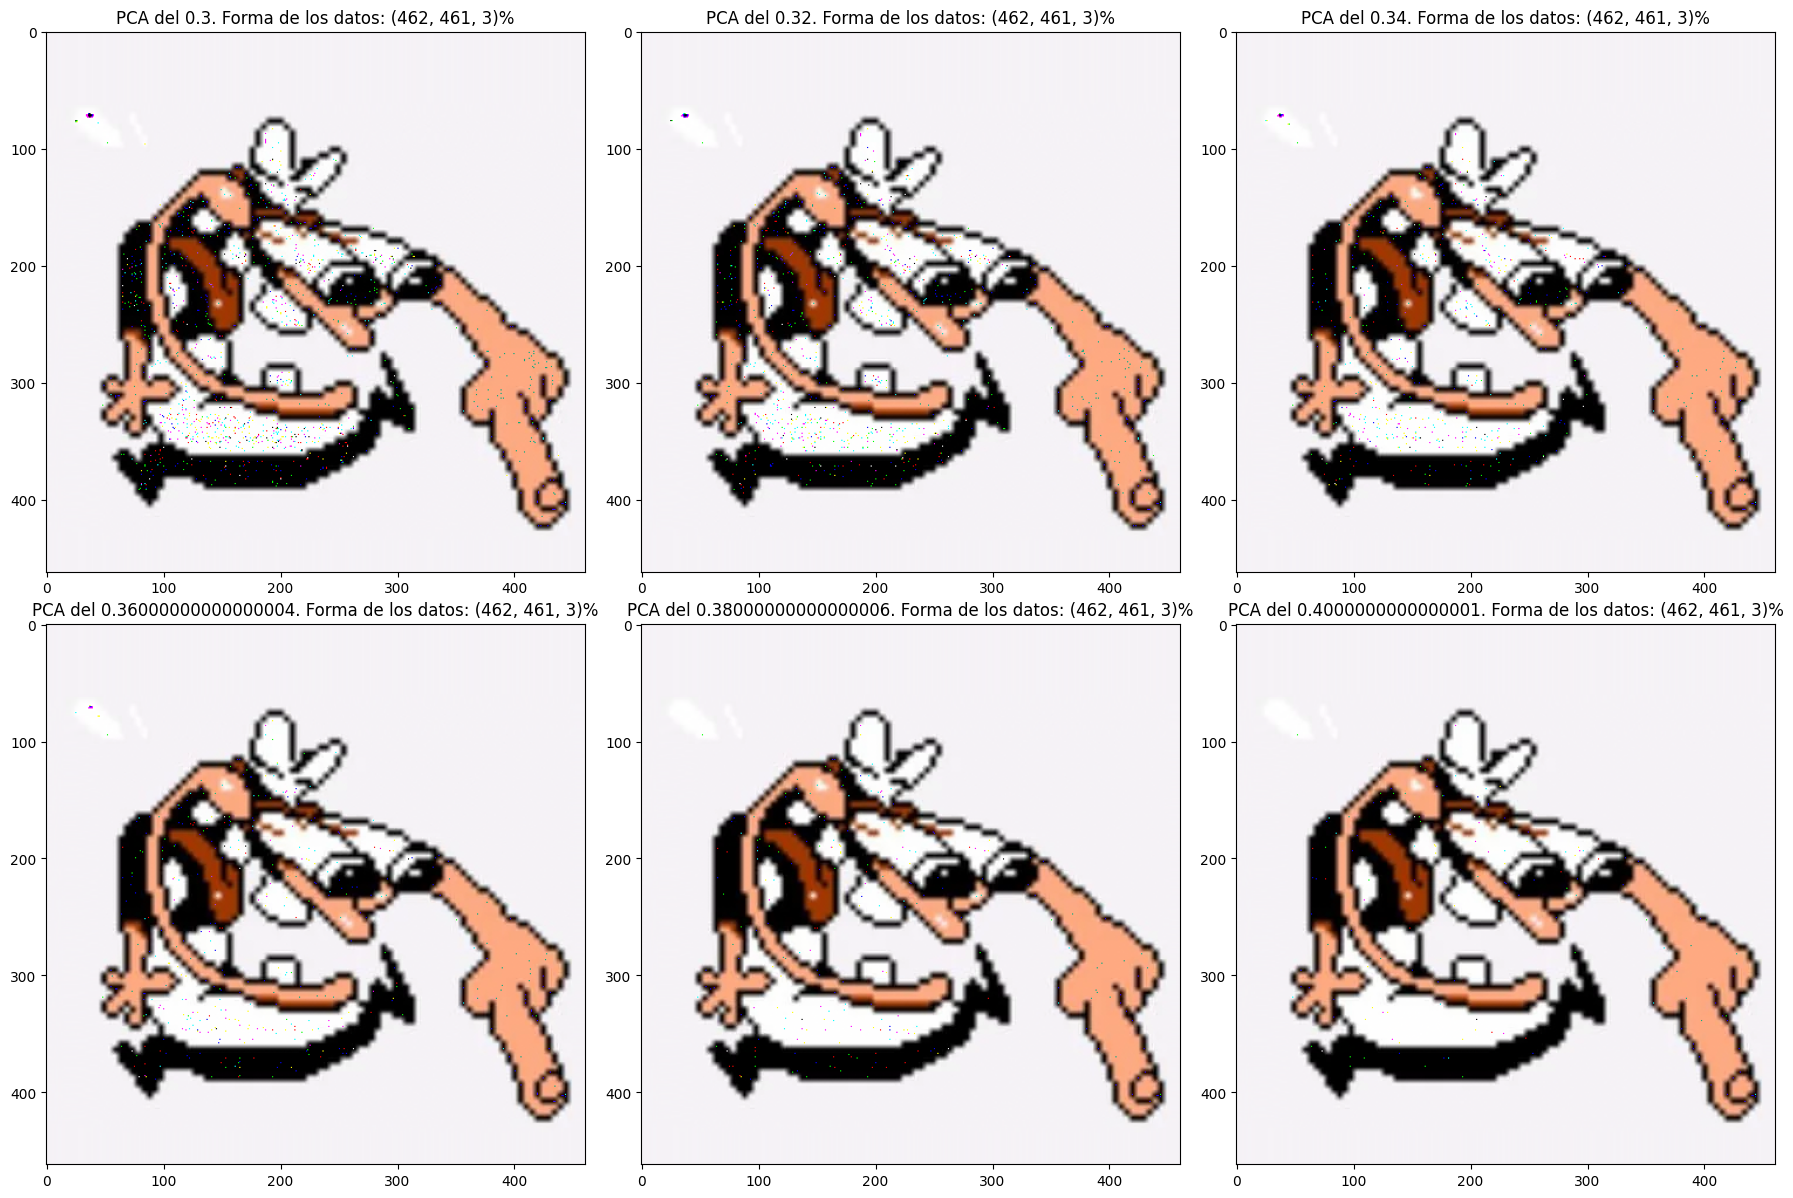

In [19]:
# Splitting the image in R,G,B arrays.

blue, green, red = cv2.split(img)

porcentajeDePCA = np.arange(start = 0.3, stop = 0.4, step = 0.02)

i = 1

figure, axes = plt.subplots(2, 3, figsize=(18,12) )

for porcentaje in porcentajeDePCA:
  #initialize PCA with first 20 principal components
  pca = PCA( int( 461 * porcentaje ) )

  #Applying to red channel and then applying inverse transform to transformed array.
  red_transformed = pca.fit_transform(red)
  red_inverted = pca.inverse_transform(red_transformed)

  #Applying to Green channel and then applying inverse transform to transformed array.
  green_transformed = pca.fit_transform(green)
  green_inverted = pca.inverse_transform(green_transformed)

  #Applying to Blue channel and then applying inverse transform to transformed array.
  blue_transformed = pca.fit_transform(blue)
  blue_inverted = pca.inverse_transform(blue_transformed)



  img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)

  #


  plt.subplot( 2, 3, i )
  #viewing the compressed image
  plt.title( f'PCA del {porcentaje}. Forma de los datos: {img_compressed.shape}%' )
  plt.imshow(img_compressed)

  i += 1

plt.tight_layout()
plt.show()

In [20]:
blue, gree, red = cv2.split( img )

pca = PCA( int(461 * 0.2) )

red_transformed = pca.fit_transform( red )
red_inverted = pca.inverse_transform( red_transformed )

print( red_transformed.astype(np.uint8).shape )
print( red_inverted.astype(np.uint8).shape )

(462, 92)
(462, 461)


# <font color='#ff2800'> **Referencias** </font>

* Wikipedia contributors. (n.d.). Combinación lineal. Wikipedia, The Free Encyclopedia. https://es.wikipedia.org/w/index.php?title=Combinaci%C3%B3n_lineal&oldid=147461722

* PCA#. (n.d.). Scikit-Learn. Retrieved May 29, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

* Starmer, S. W. J. [@statquest]. (2018, April 2). StatQuest: Principal Component Analysis (PCA), step-by-step. Youtube. https://www.youtube.com/watch?v=FgakZw6K1QQ

* Dog, H. [@heisenbergsdog1630]. (2020, marzo 11). Principle component analysis: Visualized in 3D. Youtube. https://www.youtube.com/watch?v=De8HoMbis4k

* Wasnik, A. (2020, octubre 19). Principal Component Analysis for image data in python. AskPython. https://www.askpython.com/python/examples/principal-component-analysis-for-image-data